In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')

In [3]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/alkalinity/*may21/SalishSea_1d_202105[0-3][0-9]_202105[0-3][0-9]_chem_T.nc'
file_list = glob.glob(file_pattern)

new = xr.open_mfdataset(file_list, data_vars=['CO2_flux'])  
new = new.drop(['time_counter'])
time_values = ['05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10','05-11', '05-12', '05-13', '05-14', '05-15', '05-16','05-17','05-18', '05-19', '05-20', '05-21', '05-22','05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29', '05-30', '05-31']
new = new.assign_coords(time_counter = time_values)
new

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 31)
Coordinates:
    nav_lat                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                (time_counter) <U5 '05-01' '05-02' ... '05-31'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_nav_lat              (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                        (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds               (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    PAR                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20210501_20210531_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 21:33:20 GMT
    uuid:         935cd8f4-116f-437e-aac2-ef6ce5cc36fb

In [4]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})

area = meshmask.e1t[0] * meshmask.e2t[0]
volumn = meshmask.e1t[0] * meshmask.e2t[0] * meshmask.e3t_0[0]
volumn = volumn.rename({'z' : 'deptht'})

tmask

<xarray.DataArray 'tmask' (deptht: 40, y: 898, x: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: deptht, y, x

In [5]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/long_run/*may18/SalishSea_1d_201805[0-3][0-9]_201805[0-3][0-9]_chem_T.nc'
file_list = glob.glob(file_pattern)

base = xr.open_mfdataset(file_list, data_vars=['CO2_flux'])  
base = base.drop(['time_counter'])
time_values = ['05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10','05-11', '05-12', '05-13', '05-14', '05-15', '05-16','05-17','05-18', '05-19', '05-20', '05-21', '05-22','05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29', '05-30', '05-31']
base = base.assign_coords(time_counter= time_values)

In [6]:
iz = 30
x_slice = slice(250+iz, 350-iz)
y_slice = slice(400+iz, 500-iz)
diff = new['CO2_flux'].isel(y = y_slice, x = x_slice) - base['CO2_flux'].isel(y = y_slice, x = x_slice)
diff


<xarray.DataArray 'CO2_flux' (time_counter: 31, y: 40, x: 40)>
dask.array<sub, shape=(31, 40, 40), dtype=float32, chunksize=(1, 40, 40), chunktype=numpy.ndarray>
Coordinates:
    nav_lat       (y, x) float32 49.09 49.09 49.09 49.1 ... 49.31 49.32 49.32
    nav_lon       (y, x) float32 -123.4 -123.4 -123.4 ... -123.3 -123.3 -123.3
  * time_counter  (time_counter) <U5 '05-01' '05-02' '05-03' ... '05-30' '05-31'
Dimensions without coordinates: y, x

In [7]:
tmask = tmask.isel(deptht = 0, y = y_slice, x = x_slice)
tmask

<xarray.DataArray 'tmask' (y: 40, x: 40)>
[1600 values with dtype=int8]
Dimensions without coordinates: y, x

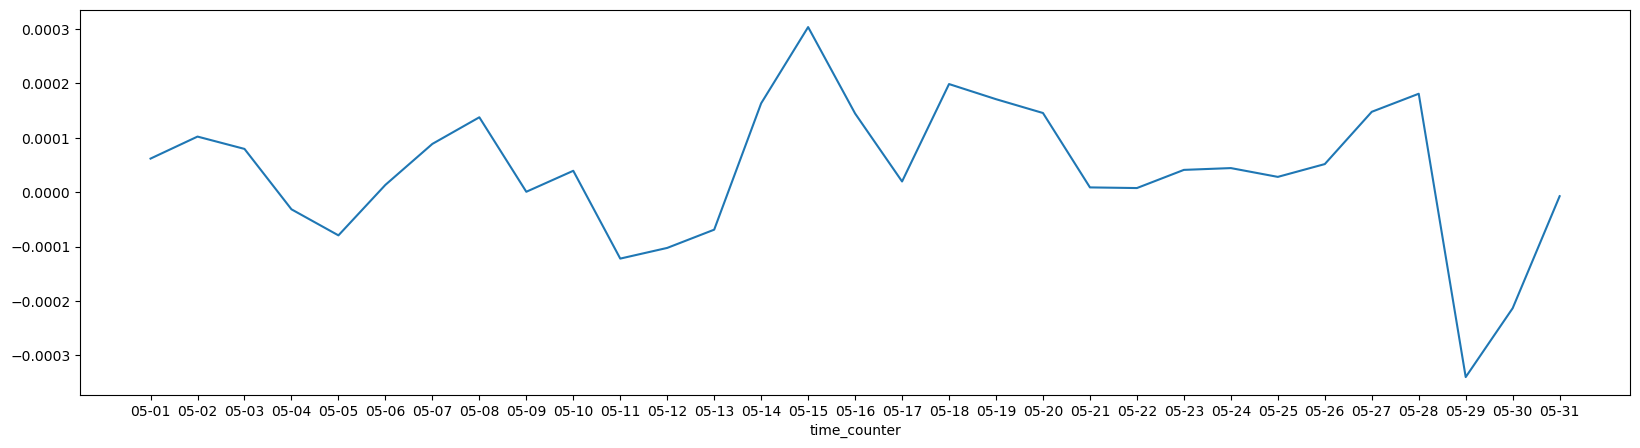

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
diff_time = (diff * area.isel(y = y_slice, x = x_slice)).where(tmask).sum(axis = 1).sum(axis = 1) / area.isel(y = y_slice, x = x_slice).where(tmask).sum(axis = 0).sum(axis = 0)
diff_time.plot()

In [9]:

diff_sum = (diff * area.isel(y = y_slice, x = x_slice)).where(tmask).sum(axis = 1).sum(axis = 1)
diff_sum

<xarray.DataArray (time_counter: 31)>
dask.array<sum-aggregate, shape=(31,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) <U5 '05-01' '05-02' '05-03' ... '05-30' '05-31'

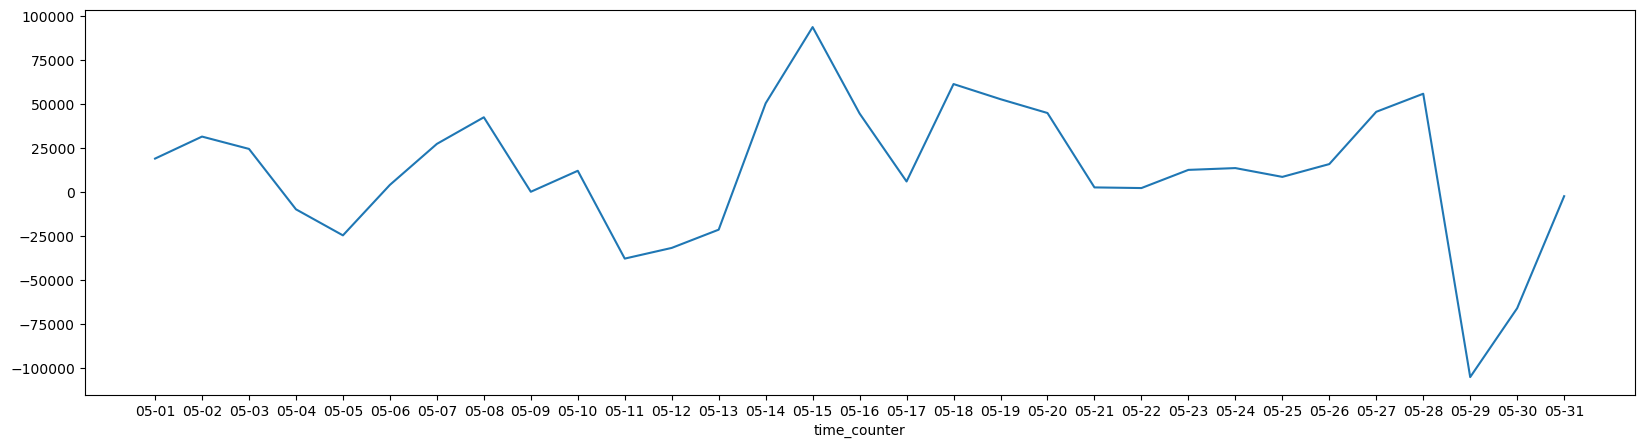

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
diff_sum.plot(ax=axs)

In [11]:
def planview(base, new, field, it, dvmax):
    fig, axs = plt.subplots(1, 1, figsize=(6, 4))
    iz = 30  # width of domain plotted
    (new[field][it, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask).plot(ax=axs, cmap=cm_bwr, vmax=dvmax, vmin=-dvmax)
    axs.set_title(f'Difference (New-Base) {field}')
    axs.set_xlabel('x')
    axs.set_ylabel('y')

    axs.scatter(304 - 280, 446 - 430, marker = 'x', color = 'g')
    axs.scatter(304 - 280, 447 - 430, marker = 'x', color = 'g')
    axs.scatter(305 - 280, 446 - 430, marker = 'x', color = 'g')
    axs.scatter(305 - 280, 447 - 430, marker = 'x', color = 'g')

In [12]:
newMay = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/31may21/SalishSea_1d_20210531_20210531_chem_T.nc')
baseMay = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/31may18/SalishSea_1d_20180531_20180531_chem_T.nc')
baseMay

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2018-05-31T12:0...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20180501_20180531_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-23 10:32:30 GMT
    uuid:         b37a7664-0e53-4c2d-b675-bce9ec40584a

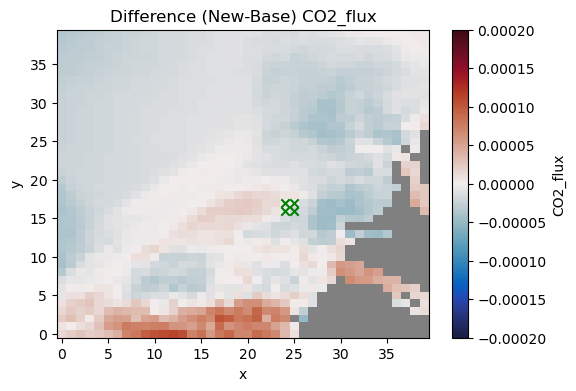

In [14]:
planview(baseMay, newMay, 'CO2_flux', 0, 0.0002)
